# Sentiment Analysis on IMDb Movie Reviews Dataset

## Abstract

This notebook explores text classification task of sentiment analysis on the IMDb movie reviews dataset using the bag-of-words and TF-IDF vectorization methods, and a naive Bayes, logistic regression, and SVM classifiers. 

## Table of Contents

>[Sentiment Analysis on IMDb Movie Reviews Dataset](#scrollTo=AsYrvE7GL-Zs)

>>[Abstract](#scrollTo=A_KPEIeVMEt9)

>>[Table of Contents](#scrollTo=HzqFwlWtMJgU)

>>[Sentiment Analysis](#scrollTo=K2Fbs5e_MLAx)

>>>[Feature Extraction](#scrollTo=9SiURGCdPOmr)

>>>[Dimensionality Reduction](#scrollTo=-8iKeuybQ2E6)

>>>[Classification](#scrollTo=ln59hS-LSPGQ)

>>>[Evaluation](#scrollTo=J7xjK6RwSQtG)

>>[Implementation](#scrollTo=5X3uRJ1jzfm7)

>>>[Imports](#scrollTo=6ORKupGTzlMw)

>>>[IMDb Movie Reviews Dataset](#scrollTo=x4ffSBagyc3v)

>>>[Load the Dataset into a DataFrame](#scrollTo=HiMxnM8BzobK)

>>>[Text Preprocessing](#scrollTo=cYlBvMrtT_PB)

>>>[Prepare Train/Val/Test Splits](#scrollTo=syyuikyaGuWm)

>>[Text Vectorization](#scrollTo=9CorM9zGVPQ9)

>>>[Bag-of-Words Model](#scrollTo=Y1ubcWhhVVkq)

>>>[Term Frequency-Inverse Document Frequency](#scrollTo=1XB_qBHMYy6B)

>>[Classification](#scrollTo=rpfwxDcmboHe)

>>>[Naive Bayes Classifier](#scrollTo=eOOrbATHbpb8)

>>>[Logisitc Regression](#scrollTo=N0ahX7YWUp1D)

>>>[SVM Classifier](#scrollTo=06u6ex9WV303)

>>>[Performance Summary](#scrollTo=Pw5pd-0MZq5c)

>>[Model Evaluation](#scrollTo=ju2VqJvpawIr)

>>[Error Analysis](#scrollTo=7cmWP8PpdBQQ)



## Sentiment Analysis

Sentiment analysis (or opinion mining) is a natural language processing (NLP) classification task of determining the sentiment - the positive or negative orientation a writer expresses toward some subject in a given text. 

Sentiment analysis allows businesses to identify customer sentiment toward
products, brands or services in online conversations and feedback. Sentiment analysis models focus on polarity (positive, negative, neutral) but also on feelings and emotions (e.g. angry, happy, sad) and even on intentions (e.g. interested, not interested).

Most text classification and document categorization systems can be deconstructed into the following four phases: 
- Features Extraction
- Dimensionality Reduction
- Classification
- Evaluation 

### Feature Extraction

In general, texts and documents are unstructured data sets. However, these unstructured text sequences must be converted into a structured feature space when using mathematical modeling as part of a classifier. First, the data needs to be cleaned to omit unnecessary characters and words. After the data has been cleaned, formal feature extraction methods can be applied. 

The common techniques of feature extractions are:
- Bag-of-Words (BoW)
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Word2Vec  
- Global Vectors for Word Representation (GloVe)

These methods are categorized as either word embedding or weighted word feature extraction techniques.

### Dimensionality Reduction

The dimensionality reduction step is an optional part of the pipeline which could be part of the classification system. For example, using Term Frequency-Inverse Document Frequency (TF-IDF) as a feature extraction method when there are 200k unique words in the training set, leads to a very expensive computational cost. Thus, dimensionality reduction techniques such as PCA, LDA, and NMF can reduce the computation time by projecting the feature space onto another lower-dimensional space.

### Classification

One of the simplest classification algorithms are the Naive Bayes and logistic regression classifiers. However, deep learning approaches have achieved surpassing results in comparison to traditional machine learning algorithms.

### Evaluation

Accuracy calculation is the simplest method of evaluation but does not work for unbalanced data sets. Metrics like $F_β$ are more informative in this case.

## Implementation

### Imports

In [1]:
# Download and Extract the Dataset
import os
import tarfile

from io import BytesIO
from urllib.request import urlretrieve

# Loading the Dataset
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Preprocessing the Dataset
import re
import nltk
import string

from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download("punkt")
nltk.download("omw-1.4")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Text Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [54]:
# Models Creation
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Models Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import matplotlib.pyplot as plt

### IMDb Movie Reviews Dataset

The IMDb Movie Reviews dataset is a binary sentiment analysis dataset consisting of 50,000 reviews from the Internet Movie Database (IMDb) labeled as positive or negative. The dataset contains an even number of positive and negative reviews. Only highly polarizing reviews are considered. A negative review has a score ≤ 4 out of 10, and a positive review has a score ≥ 7 out of 10. No more than 30 reviews are included per movie. The dataset contains additional unlabeled data.

The [dataset](http://ai.stanford.edu/~amaas/data/sentiment/) is downloaded as a *`.tar.gz`* file. The file is then extracted into the `data/` directory.

Thus, the structure of the dataset directory is as follows:

```
data/
├── aclImdb/
      ├── test/
      │     ├── pos/
      │     ├── neg/
      ├── train/
            ├── pos/
            └── neg/
```

In [5]:
# Specify the dataset URL
corpus_url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

working_directory = os.getcwd()
dataset_directory = os.path.join(os.getcwd(), "data")
tarfile_path = os.path.join(working_directory, "aclImdb_v1.tar.gz")

# Download and extract the dataset, if haven't already done so
if "data" not in os.listdir(working_directory):

  print("Downloading the Dataset...")
  urlretrieve(corpus_url, tarfile_path)
  print("Dataset Downloaded.")

  print("Extracting the Dataset...")
  with tarfile.open(tarfile_path) as tar_file:
    tar_file.extractall(dataset_directory)
  print("Dataset Extracted.")

else:
  print("Dataset is ready.")

# Update the dataset directory to "/data/aclImdb"
dataset_directory = os.path.join(dataset_directory, "aclImdb")

Dataset is ready.


### Load the Dataset into a DataFrame

The resulting DataFrame should be of the following structure:

| review | label | split |
| --- | --- | --- |
| --- | --- | --- |

Where:

*   `review` *(str)* is the text of the review.
*   `label` *(int)* 1 for positive reviews, 0 for negative ones.
*   `split` *(str)* whether the review belongs to the `train` or `val` set.

In [6]:
# Create lists that will contain the reviews and group them in a dictionary
train_pos, train_neg, test_pos, test_neg = [], [], [], []
reviews_dict = {
    "train/pos": train_pos,
    "train/neg": train_neg,
    "test/pos": test_pos,
    "test/neg": test_neg
}

# Iterate over the dataset train/test pos/neg directories
for data_subset in reviews_dict:
  
  # Iterate over each file in the current directory
  for file_name in os.listdir(f"{dataset_directory}/{data_subset}"):

    # Open file and append the text review in its corresponding dictionary list
    with open(f"{dataset_directory}/{data_subset}/{file_name}") as review_file:
      reviews_dict[data_subset].append(review_file.read())

# Group all reviews in a DataFrame
imdb_df = pd.concat(
    [pd.DataFrame({"split": "train", "sentiment": 1, "raw_review": train_pos}),
    pd.DataFrame({"split": "train", "sentiment": 0, "raw_review": train_neg}),
    pd.DataFrame({"split": "test", "sentiment": 1, "raw_review": test_pos}),
    pd.DataFrame({"split": "test", "sentiment": 0, "raw_review": test_neg})],
    axis=0, ignore_index=True
)

In [7]:
imdb_df

,split,sentiment,raw_review
0,train,1,The most interesting thing about Miryang (Secr...
1,train,1,Filmed by MGM on the same sets as the English ...
2,train,1,This is the best dub I've ever heard by Disney...
3,train,1,Arguebly Al Pacino's best role. He plays Tony ...
4,train,1,Michael Bowen plays an innocentish young man w...
...,...,...,...
49995,test,0,Even though this was set up to be a showcase f...
49996,test,0,"AWiP tries to be funny, scary, tense, and roma..."
49997,test,0,I saw this only because my 10-yr-old was bored...
49998,test,0,Following the movie that represents the pinnac...


### Text Preprocessing

Proper text cleaning and normalization is crucial for an informative featurization. The following step are applied to the raw corpus to clean and normalize it:

*   **Lowercase** the entire corpus.
*   Remove any **HTML tags** (these are a side effect of scraping the reviews off of the web).
*   Remove any **numeric values**.
*   Replace **verb contractions** with their complete form.
*   Remove **punctuations**.
*   Remove **stopwords**.
*   **Stem** the corpus.

In [8]:
stop_words = set(stopwords.words("english"))
stop_words.difference_update({"no", "not", "nor"})
stop_words = stop_words.union({"'d", "'s"})
stemmer = PorterStemmer()

def preprocess(text):

  # Lowercase the review
  text = text.lower()

  # Remove html tags
  text = re.sub("<[^>]*>", " ", text)

  # Remove numbers
  text = re.sub("[0-9]+", " ", text)
  
  # Replace verbs contractions with their complete form
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"can't", "can not", text)
  text = re.sub(r"n't", " not", text)
  text = re.sub(r"'ve", " have", text)
  text = re.sub(r"'ll", " will", text)
  text = re.sub(r"'re", " are", text)
  text = re.sub(r"'m", " am", text)

  # Tokenize the text into a list
  words_list = word_tokenize(text)

  # Remove stop words
  filtered_tokens = [w for w in words_list if w not in stop_words]

  # Stem tokens
  stemmed_tokens = [stemmer.stem(w) for w in filtered_tokens]
  text = " ".join(stemmed_tokens)

  # Remove punctuation
  text = text.translate(str.maketrans("", "", string.punctuation))

  # Remove redundant whitespace
  text = re.sub("[ ]+", " ", text)

  return text

In [9]:
imdb_df["raw_review"][2]

"This is the best dub I've ever heard by Disney, as well as the best adaptation since the biggest abuse ever on soundtrack, themes, characters, dialogues in Kiki Delivery Service. Urrrghhh<br /><br />This one has different atmosphere, especially the deviation from the common heroine. This one has both hero and heroine (although I don't really endorse the use of hero & heroine here, since Miyazaki is out from the stereotype & common theme). As usual, after being introduced by Spirited away, amazed by Mononoke, troubled by Grave of Fireflies, and deeply touched by Majo no Takkyuubin , this one start with a bit doubt in my part. Wondering if this will be the first Ghibi's dud. Well, in the end just like Only Yesterday and Whisper of the Heart, I ended up giving 10 rating. I'd give 9.8 rating, but the additional 0.2 is there to share the good feeling by encouraging people to see the movie.<br /><br />SPOILER Somehow I see this as a sad movie, people die in this one, the lonely robot, the a

In [10]:
preprocess(imdb_df["raw_review"][2])

'best dub ever heard disney well best adapt sinc biggest abus ever soundtrack theme charact dialogu kiki deliveri servic urrrghhh one differ atmospher especi deviat common heroin one hero heroin although not realli endors use hero heroin sinc miyazaki stereotyp common theme usual introduc spirit away amaz mononok troubl grave firefli deepli touch majo no takkyuubin one start bit doubt part wonder first ghibi dud well end like yesterday whisper heart end give rate give rate addit share good feel encourag peopl see movi spoiler somehow see sad movi peopl die one lone robot abandon place end destruct mankind realli not live much power collaps scene gave patch metropoli end sad somehow plot appar review soundtrack rule well alway joe hisaishi realli belong uematsu kanno william caliberpeopl bring movi game event life even linger moment astound composit feel good movi use part us cinema classic day wonder life etc etc well thing chang '

In [11]:
imdb_df["preprocessed_review"] = imdb_df["raw_review"].apply(preprocess)
imdb_df

,split,sentiment,raw_review,preprocessed_review
0,train,1,The most interesting thing about Miryang (Secr...,interest thing miryang secret sunshin actor je...
1,train,1,Filmed by MGM on the same sets as the English ...,film mgm set english version german garbo seco...
2,train,1,This is the best dub I've ever heard by Disney...,best dub ever heard disney well best adapt sin...
3,train,1,Arguebly Al Pacino's best role. He plays Tony ...,arguebl al pacino best role play toni montana ...
4,train,1,Michael Bowen plays an innocentish young man w...,michael bowen play innocentish young man hitch...
...,...,...,...,...
49995,test,0,Even though this was set up to be a showcase f...,even though set showcas kickbox swordplay vamp...
49996,test,0,"AWiP tries to be funny, scary, tense, and roma...",awip tri funni scari tens romant fail everi re...
49997,test,0,I saw this only because my 10-yr-old was bored...,saw yrold bore friend hate cours like movi fir...
49998,test,0,Following the movie that represents the pinnac...,follow movi repres pinnacl ninja genr name the...


### Prepare Train/Val/Test Splits

In [49]:
def drop_cols_reset_index(split):
  split = split.drop(["split", "raw_review"], axis=1)
  split = split.rename(columns={"preprocessed_review": "review"})
  split = split.reset_index(drop=True)
  return split
  
train_val_df = imdb_df[imdb_df["split"] == "train"]
test_df = imdb_df[imdb_df["split"] == "test"]
train_df, val_df = train_test_split(train_val_df, test_size=5000, shuffle=True)

train_val_df = drop_cols_reset_index(train_val_df)
train_df = drop_cols_reset_index(train_df)
test_df = drop_cols_reset_index(test_df)
val_df = drop_cols_reset_index(val_df)

In [13]:
val_df

,sentiment,review
0,1,deathtrap first releas poster reproduc cover d...
1,1,actual realli like seen cartoon far sure anim ...
2,1,movi wonder hard find word describ time not de...
3,1,earli mani us embrac hippyacidaltern cultur wh...
4,1,not believ see film think perhap thought anoth...
...,...,...
4995,1,film rot core flexibl moral yet quirki sens ju...
4996,1,went movi know noth end realli enjoy lack auth...
4997,1,movi basic human relat interact main charact o...
4998,0,although product jerri jameson direct definit ...


In [50]:
x_train_val_reviews = train_val_df["review"]
y_train_val = train_val_df["sentiment"]

x_train_reviews = train_df["review"]
y_train = train_df["sentiment"]

x_val_reviews = val_df["review"]
y_val = val_df["sentiment"]

x_test_reviews = test_df["review"]
y_test = test_df["sentiment"]

In [15]:
x_train_reviews

0        definit not worth rental catch cabl pleasantli...
1        ever call make bad film reflect stupid human c...
2         jami foxx suppos funni realli believ funni we...
3        one favorit movi nostalg end movi sullivan fam...
4        film chocolat beau travail other propel french...
                               ...                        
19995    unusu see film perform singl actor good one fe...
19996    film caught surpris friend told movi chick fli...
19997    desper find happen twitch origin movi here cha...
19998    one alltim favorit film may move slowli well w...
19999    skinni seem much older thought still cool bike...
Name: review, Length: 20000, dtype: object

## Text Vectorization

In [16]:
VOCABULARY_SIZE = 30000

### Bag-of-Words Model

The bag-of-words (BoW) model is a sparse representation that maps arbitrary text into fixed-length (equal to that of the corpus vocabulary) vectors by counting the number of occurrences of the words (unigram) in the given text.  On the other hand, it is very common to also use bigrams and trigrams. In this way, the text feature extracted could detect more information in comparison to unigram.

**Limitations of the BoW Model**

- Dimensionality Problem

  For a vocabulary of size $|V|$, the bag-of-words model encodes every document as a $|V|$-dimensional sparse vector. As vocabulary sizes may potentially run into millions, bag-of-word models face scalability challenges.

- Semantic Problem

  The main issue with the Bag-of-Words model is that it considers all words as equally important, in the case of a binary bag-of-words. While in the term-frequency bag-of-words, many words that occur frequently aren't very informative (e.g. stop words). Even if stop words are removed, there can still be highly frequent and uninformative words. For example, in the IMDb movie reviews corpus, most reviews/documents will contain the words "movie", "film", etc. 

In [17]:
bow_vectorizer = CountVectorizer(
    max_features=VOCABULARY_SIZE,
    ngram_range=(1, 2)
)

bow_vectorizer.fit(x_train_reviews)

CountVectorizer(max_features=30000, ngram_range=(1, 2))

In [18]:
bow_x_train = bow_vectorizer.transform(x_train_reviews)
bow_x_test = bow_vectorizer.transform(x_test_reviews)
bow_x_val = bow_vectorizer.transform(x_val_reviews)

In [19]:
bow_x_train.shape

(20000, 30000)

### Term Frequency-Inverse Document Frequency

TF-IDF provides an improved weighing over the bag-of-words model, by taking into consideration how unique a word is to the given document. In bag-of-words, vectorization was just concerned with the frequency of vocabulary words in a given document. As a result, articles, prepositions, and conjunctions which don’t contribute a lot to the meaning get as much importance as adjectives. 

TF-IDF overcomes this issue. Words that get repeated too often don’t overpower less frequent but important words. It does so by computing the product of the following two quantities:

*    Term Frequency, which is just the frequency of the word in the text.
$tf_{t, d}=log_{10}(1+count(t, d))$

*    Inverse Document Frequency, which gives higher weight to words that occur only in few documents.
$idf_t=log_{10}(\frac{N}{df_t})$
where $N$ is the total number of documents, and $df_t$ is the number of documents the word occurs in. 

**Limitations of TF-IDF**

While TF-IDF provides an improved word weighting. It still suffers from the same issues as the BoW model.

In [20]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=VOCABULARY_SIZE,
    ngram_range=(1, 2)
)

tfidf_vectorizer.fit(x_train_reviews)

TfidfVectorizer(max_features=30000, ngram_range=(1, 2))

In [51]:
tfidf_x_train_val = tfidf_vectorizer.transform(x_train_val_reviews)
tfidf_x_train = tfidf_vectorizer.transform(x_train_reviews)
tfidf_x_test = tfidf_vectorizer.transform(x_test_reviews)
tfidf_x_val = tfidf_vectorizer.transform(x_val_reviews)

## Classification

In [22]:
def evaluate_model(y_true, y_pred):

  # Classification Report
  print("Classification Report:-")
  print(classification_report(y_true, y_pred))
  
  # Confusion Matrix
  print("Confusion Matrix:-")
  ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred,
                                          normalize="true", 
                                          display_labels=["Positive", "Negative"], 
                                          cmap=plt.cm.Blues)
  plt.show()

In [23]:
def fit_model(model, x_train, x_val, y_train, y_val):

  # Training
  model.fit(x_train, y_train)

  # Evaluation
  print("Model Results on the training set...")
  evaluate_model(y_train, model.predict(x_train))

  print("\nModel Results on the validation set...")
  evaluate_model(y_val, model.predict(x_val))

### Naive Bayes Classifier

The Naïve Bayes classifier method is theoretically based on Bayes theorem. 

Let $n$ be the number of documents $\{d_1, ..., d_n\}$ to be classified into one of $k$ classes $\{c_1, ..., c_k\}$.

- Bayes's theorem can be expressed as 
  $P(c|d) = \frac{P(d|c)P(c)}{P(d)}$.

- Thus, a prediction class $\hat c$ is computed as $\hat c=argmax_cP(d|c)P(c)=argmax_cP(w_1, ..., w_T|c)P(c)$.

- The Naive assumption of $i.i.d.$ data points enable the expression of the joint probability as a product: $\hat c=argmax_c\Pi_{i=0}^{T}P(w_i|c)P(c)$.

- This is equivalent to: $\hat c=argmax_c\Sigma_{i=0}^{T}log P(w_i|c)+log P(c)$.

In [24]:
nb_model = MultinomialNB()

Bag-of-Words Results:
----------------------------------------
Model Results on the training set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     10016
           1       0.91      0.90      0.90      9984

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000

Confusion Matrix:-


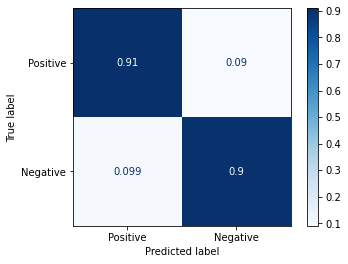


Model Results on the validation set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2484
           1       0.88      0.86      0.87      2516

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

Confusion Matrix:-


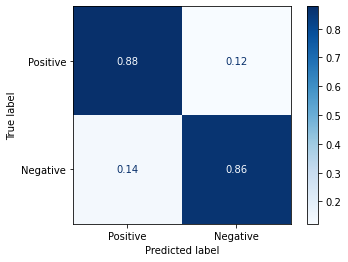

In [25]:
print("Bag-of-Words Results:")
print("----------------------------------------")
fit_model(nb_model, bow_x_train, bow_x_val, y_train, y_val)


TF-IDF Results:
----------------------------------------
Model Results on the training set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     10016
           1       0.91      0.92      0.92      9984

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000

Confusion Matrix:-


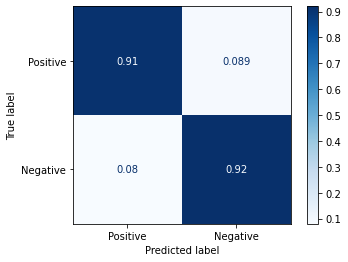


Model Results on the validation set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2484
           1       0.88      0.87      0.88      2516

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.87      5000
weighted avg       0.88      0.88      0.88      5000

Confusion Matrix:-


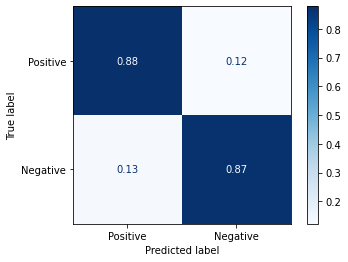

In [26]:
print("\nTF-IDF Results:")
print("----------------------------------------")
fit_model(nb_model, tfidf_x_train, tfidf_x_val, y_train, y_val)

### Logisitc Regression

In [27]:
lr_model = LogisticRegression(max_iter=1000)

Bag-of-Words Results:
----------------------------------------
Model Results on the training set...
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10016
           1       1.00      1.00      1.00      9984

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:-


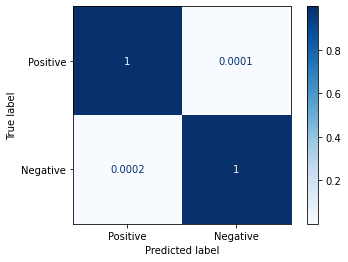


Model Results on the validation set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2484
           1       0.89      0.88      0.88      2516

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

Confusion Matrix:-


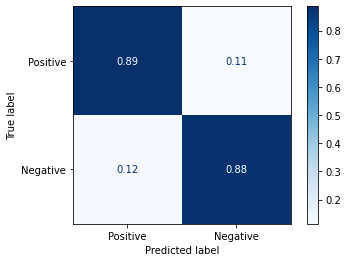

In [28]:
print("Bag-of-Words Results:")
print("----------------------------------------")
fit_model(lr_model, bow_x_train, bow_x_val, y_train, y_val)


TF-IDF Results:
----------------------------------------
Model Results on the training set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10016
           1       0.93      0.95      0.94      9984

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000

Confusion Matrix:-


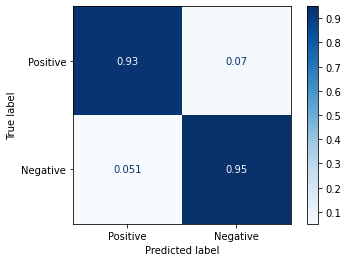


Model Results on the validation set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2484
           1       0.88      0.90      0.89      2516

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Confusion Matrix:-


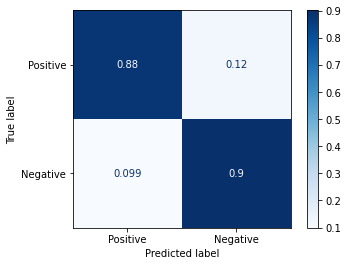

In [29]:
print("\nTF-IDF Results:")
print("----------------------------------------")
fit_model(lr_model, tfidf_x_train, tfidf_x_val, y_train, y_val)

### SVM Classifier

In [36]:
svc_model = LinearSVC(max_iter=2000)

Bag-of-Words Results:
----------------------------------------
Model Results on the training set...
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10016
           1       1.00      1.00      1.00      9984

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:-


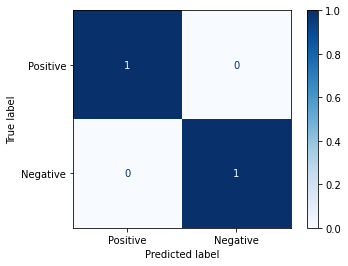


Model Results on the validation set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2484
           1       0.88      0.87      0.87      2516

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

Confusion Matrix:-


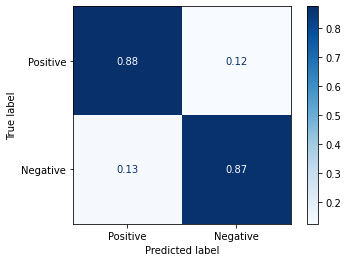

In [37]:
print("Bag-of-Words Results:")
print("----------------------------------------")
fit_model(svc_model, bow_x_train, bow_x_val, y_train, y_val)


TF-IDF Results:
----------------------------------------
Model Results on the training set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10016
           1       1.00      0.99      1.00      9984

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:-


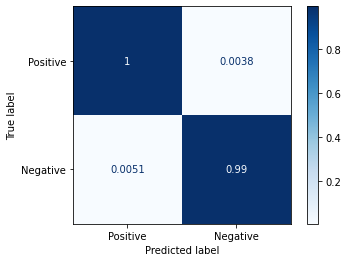


Model Results on the validation set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2484
           1       0.89      0.89      0.89      2516

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Confusion Matrix:-


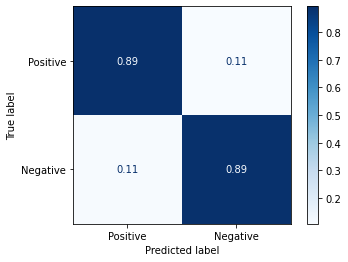

In [38]:
print("\nTF-IDF Results:")
print("----------------------------------------")
fit_model(svc_model, tfidf_x_train, tfidf_x_val, y_train, y_val)

### Performance Summary

| Classifier | Training Macro F1 | Validation Macro F1 |
| -- | -- | -- |
| Naive Bayes | 0.92 | 0.87 |
| Logistic Regression | 1.00 | 0.87 |
| SVM | 1.00 | 0.89 |

## Model Evaluation

Model Results on the training set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12500
           1       0.99      0.99      0.99     12500

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000

Confusion Matrix:-


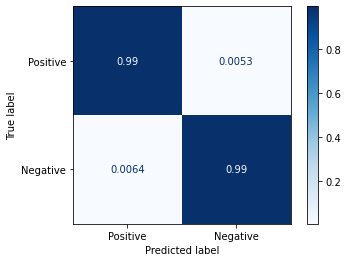


Model Results on the validation set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     12500
           1       0.89      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

Confusion Matrix:-


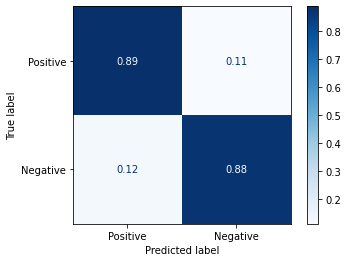

In [53]:
fit_model(svc_model, tfidf_x_train_val, tfidf_x_test, y_train_val, y_test)

## Error Analysis

In [60]:
predictions = svc_model.predict(tfidf_x_test)
predictions_confidence = svc_model.decision_function(tfidf_x_test)

false_positives_indices = []
false_negatives_indices = []
for i, sentiment in enumerate(y_test):

  # False Negative
  if sentiment and not predictions[i]:
    false_negatives_indices.append(i)

  # False Positive
  if not sentiment and predictions[i]:
    false_positives_indices.append(i)

In [66]:
most_confident_false_positive_review_index = np.argmax(predictions_confidence[false_positives_indices])
most_confident_false_negative_review_index = np.argmax(predictions_confidence[false_negatives_indices])

In [75]:
imdb_df[imdb_df["split"] == "test"].loc[25000 + most_confident_false_positive_review_index]["raw_review"]

"It has taken several viewings for me to fully appreciate this film. Initially, I was struck by the stylized sets, but found the rest slow going and dull. I thought that such a sensational subject needed the Ken Russell treatment to take it way over the top. I now find the enforced restraint (placed on the production by Mishima's widow) to be an asset. Some of the more lurid aspects of Mishima's life are reiterated and dramatized by corresponding themes from his novels. I think it helps to be familiar with the novels - that's what finally made the difference for me. Still feel the film overall could be a little tighter and warmer, but it's genuinely unique, and deserves serious attention. Love the fact that the Japanese characters speak Japanese - not English. The Philip Glass score is mesmerizing."

In [76]:
imdb_df[imdb_df["split"] == "test"].loc[25000 + most_confident_false_negative_review_index]["raw_review"]

'After spending five years in prison, Dr. Thomas Reed, played by the incomparable Vincent Ventresca, exiles himself to Purgatory Flats and winds up tending bar. He soon meets the luscious, angel-faced Sunny (Alexandra Holden). "You are wicked." he tells her. "You have no idea." she replies as she sips her Slo Comfortable Screw and languidly drags on her cig. Reed finds himself entwined in the violent troubles of her family and the femme fatale story unfolds set against the desolation and desperation of the oil-drained western town.<br /><br />Canny direction. Great performances. Superb entourage work. And some lust scenes that sizzle like the sun in Purgatory.'